Now let's get the data we will be working with today. 

#### Ski Shop Data 
from: https://raw.githubusercontent.com/Gabe-Slezak/GroupAssignment4/master/Group%2016

In [0]:
from google.colab import files
from IPython.display import Image

In [0]:
uploaded = files.upload()

Saving employees.jpg to employees.jpg
Saving Equipment.jpg to Equipment.jpg
Saving Facility.jpg to Facility.jpg
Saving sport.jpg to sport.jpg


In [0]:
uploaded2 = files.upload()

Saving Ski Shop .jpg to Ski Shop .jpg


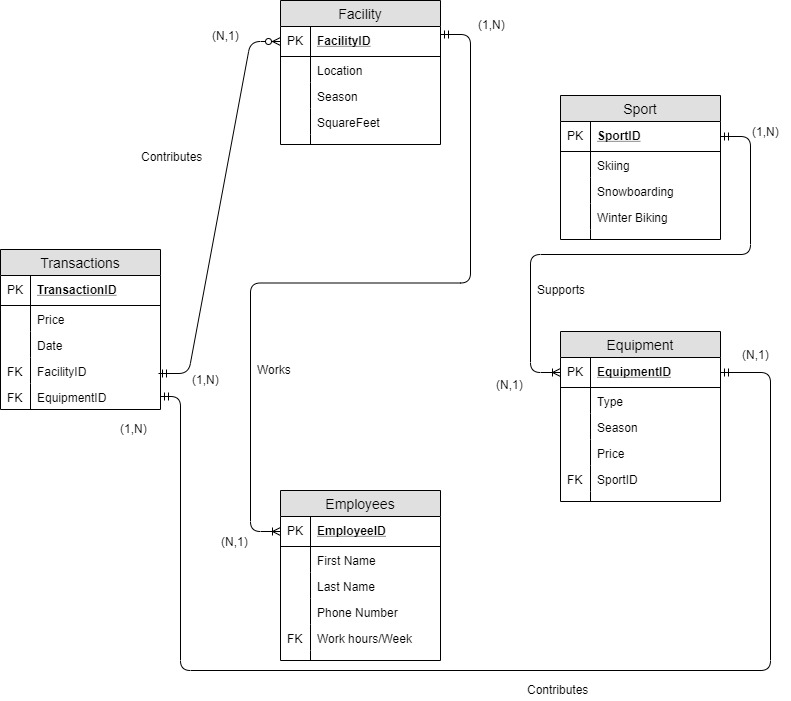

In [0]:
Image('Ski Shop .jpg')

In [0]:
#Used to make requests
import urllib

f = urllib.request.urlopen("https://raw.githubusercontent.com/Gabe-Slezak/GroupAssignment4/master/Group%2016")
SkiShopData = str(f.read().decode('utf-8'))

In [0]:
for rowOfData in SkiShopData.split("\n")[0:5]:
  print (rowOfData)

employeeID, firstName, lastName, phoneNumber, workHours
12345, Sally, Smith, 8144121234, 40
23456, Tom, Harris, 8144122345, 39
34567, Larry, Thomas, 8144123456, 41
45678, Steven, Lopez, 8144124567, 22


In [0]:
import sqlite3 # Once imported in a single notebook, it is available to us throughout the rest of the notebook. 

In [0]:
# connect to database, if not there, create it.
connectionToDatabase = sqlite3.connect('SkiShopData') 

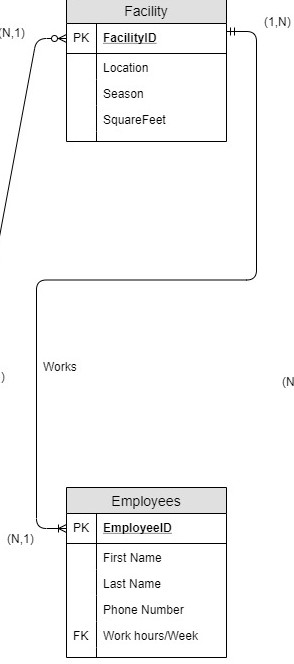

In [0]:
Image('employees.jpg')

In [0]:
cursor = connectionToDatabase.cursor()

In [0]:
cursor.execute('''drop table IF EXISTS Employees''')
connectionToDatabase.commit()
cursor.execute('''create table IF NOT EXISTS Employees (employeeID text PRIMARY KEY, firstName text, lastName text, phoneNumber real, workHours real)''')
connectionToDatabase.commit()

In [0]:
for line in SkiShopData.split("\n")[1:6]:
  data = line.split(",")
  print (data[0],data[1],data[2],data[3],data[4] )

12345  Sally  Smith  8144121234  40
23456  Tom  Harris  8144122345  39
34567  Larry  Thomas  8144123456  41
45678  Steven  Lopez  8144124567  22
56789  Susan  Mario  8144125687  20


In [0]:

for line in SkiShopData.split("\n")[1:-1]:
  data = line.split(",")
  # I like to create a string statement for my inserts. It gives me a chance to see the insert statement before I commit changes.
  insertStatement =  """insert into Employees values ("%s","%s","%s","%s","%s")""" % (data[0],data[1],data[2],data[3],data[4])
  cursor.execute(insertStatement)
  connectionToDatabase.commit() # remember to commit!



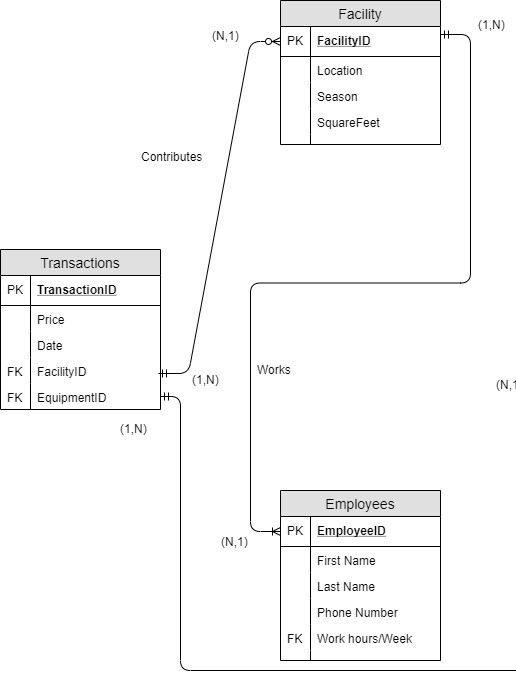

In [0]:
Image('Facility.jpg')

In [0]:
cursor.execute('''create table IF NOT EXISTS Facility (FacilityID real PRIMARY KEY, location text, season text, squareFee real)''')
connectionToDatabase.commit()

In [0]:
insertStatement =  """insert into Facility ('11111', 'East', 'Winter', '90')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Facility ('12345', 'West', 'Winter', '95')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Facility ('12321', 'East', 'Winter', '80')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Facility ('14321', 'North', 'Winter', '65')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Facility ('10928', 'South', 'Winter', '90')"""
cursor.execute(insertStatement)
#For this cell, it ran fine during class, but somehoe when one of our groupmate did some editing, it doesn't work anymore and keep showing
#incomplete output, we asked the prof about it but didn't hear back and we really tried but couldn't figure out what's wrong...

OperationalError: ignored

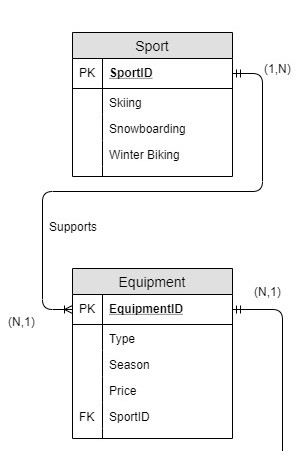

In [0]:
Image('sport.jpg')

In [0]:
cursor.execute('''create table IF NOT EXISTS Sport (sportType text PRIMARY KEY, sportStyle text, season text, EquipmentID real)''')
connectionToDatabase.commit()

In [0]:
insertStatement =  """insert into Sport ('Skiing', 'trickStyle', 'Winter', '120')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Sport ('Snowboarding', 'powderBoard', 'Winter', '951')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Sport ('Skiing', 'slopeStyle', 'Winter', '820')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Sport ('Snow Biking', 'fatTireBike', 'Winter', '165')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Sport ('Snowboarding', 'trickBoard', 'Winter', '990')"""
cursor.execute(insertStatement)

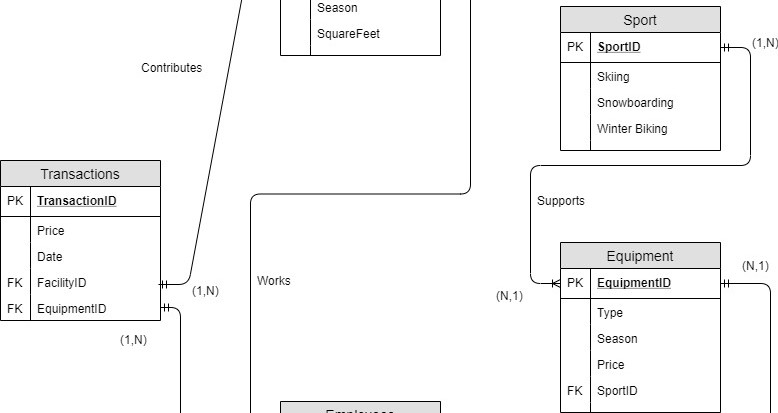

In [0]:
Image('Equipment.jpg')

In [0]:
cursor.execute('''create table IF NOT EXISTS Equipment (EquipmentID real PRIMARY KEY, type text, season text, price real, SportID real)''')
connectionToDatabase.commit()

In [0]:
insertStatement =  """insert into Equipment ('120', 'Goggles', 'Winter', '1113')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Equipment ('951', 'Boots', 'Winter', '9873')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Equipment ('820', 'Bindings', 'Winter', '0963')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Equipment ('165', 'Board', 'Winter', '2873')"""
cursor.execute(insertStatement)
insertStatement =  """insert into Equipment ('990', 'Goggles', 'Winter', '1098')"""
cursor.execute(insertStatement)

In [0]:
cursor.execute('''select * from Employees limit 5;''')
for row in cursor.fetchall():
  print (row)

Order the employee work hours from most hours to least hours


In [0]:
cursor.execute('''select * from Employees ORDER BY workHours DESC;''')
for row in cursor.fetchall():
  print (row)

Find who is working full time (Hours >= 35)

In [0]:
cursor.execute('''select firstName, lastName from Employees WHERE workHours >= 35;''')
for row in cursor.fetchall():
  print (row)

Find the employee first name who starts with letter "S"

In [0]:
#@title Default title text
cursor.execute('''select firstName from Employees WHERE firstName LIKE "S%" limit 5;''')
for row in cursor.fetchall():
  print (row)

Find the ID of the equipment used for trick-stlye skiis. 

In [0]:
cursor.execute('''select * from Sport WHERE EquipmentID = 120;''')
for row in cursor.fetchall():
  print (row)

These questions are important because they can help our company easily organize items as well as checking our employee performance, they can also be easily used to pull up information about our employees or pull up a sale or an item for a customer.